In [ ]:
import numpy as py
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from six import StringIO 
from sklearn import metrics
from IPython.display import Image  
from google.colab import files
from IPython.display import Image  
import pydotplus
import matplotlib

%matplotlib inline

In [ ]:
dengue_data = pd.read_csv('dengue.csv')
dengue_data

,dengue.p_i_d,dengue.date_of_fever,dengue.residence,dengue.days,dengue.current_temp,dengue.wbc,dengue.servere_headche,dengue.pain_behind_the_eyes,dengue.joint_muscle_aches,dengue.metallic_taste_in_the_mouth,dengue.appetite_loss,dengue.addominal_pain,dengue.nausea_vomiting,dengue.diarrhoea,dengue.hemoglobin,dengue._hematocri,dengue.platelet,dengue.dengue
0,P012,13-Jan,Bangalore,10 days,100.0,5.0,yes,no,no,yes,yes,yes,no,yes,15.0,NaN,140.0,yes
1,P011,13-Feb,New Delhi,4 days,104.0,1.0,no,yes,yes,no,no,no,no,no,9.0,22.0,80.0,no
2,P010,9-Jan,Jamica,5 days,104.0,5.0,NaN,no,no,yes,yes,yes,yes,no,NaN,NaN,120.0,yes
3,P009,12-Aug,Barbados,12 months,101.0,NaN,yes,yes,no,no,no,no,no,no,NaN,NaN,NaN,no
4,P008,12-Oct,St.Martin,3 days,101.0,NaN,yes,no,no,no,no,no,yes,no,NaN,NaN,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,P005,12-Jun,Thiland,2 weeks,103.5,2.2,yes,yes,no,yes,no,no,no,no,10.0,25.0,110.0,yes
104,P004,10-Sep,Jamica,3--4,103.0,NaN,yes,yes,yes,no,no,no,no,no,NaN,NaN,NaN,NaN
105,P003,12-Jun,WestIndies,2 weeks,101.0,NaN,yes,no,NaN,no,no,yes,no,no,NaN,NaN,NaN,yes
106,P002,12-Feb,Thiland,3--4,105.0,NaN,NaN,no,yes,no,yes,no,yes,no,NaN,NaN,NaN,yes


In [ ]:
to_drop = ["dengue.p_i_d", "dengue.date_of_fever", "dengue.wbc", "dengue.residence", "dengue.days", "dengue.current_temp",
          "dengue.hemoglobin", "dengue._hematocri", "dengue.platelet"]
dengue_data.drop(to_drop, inplace=True, axis=1)

In [ ]:
dengue_data
dengue_data = dengue_data.dropna()
dengue_data
dengue_data.to_csv('dengue_data_bersih.csv') 

In [ ]:
col_names = ["dengue.servere_headche","dengue.pain_behind_the_eyes","dengue.joint_muscle_aches","dengue.metallic_taste_in_the_mouth","dengue.appetite_loss","dengue.addominal_pain","dengue.nausea_vomiting","dengue.diarrhoea","dengue_dengue"]
feature_cols = ["dengue.servere_headche","dengue.pain_behind_the_eyes","dengue.joint_muscle_aches","dengue.metallic_taste_in_the_mouth","dengue.appetite_loss","dengue.addominal_pain","dengue.nausea_vomiting","dengue.diarrhoea"]

# load dataset
df = pd.read_csv("dengue_data_bersih - dengue_data_bersih (1).csv", header=None, names=col_names)
df

,dengue.servere_headche,dengue.pain_behind_the_eyes,dengue.joint_muscle_aches,dengue.metallic_taste_in_the_mouth,dengue.appetite_loss,dengue.addominal_pain,dengue.nausea_vomiting,dengue.diarrhoea,dengue_dengue
0,1,0,0,1,1,1,0,1,1
1,0,1,1,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0
4,1,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
67,1,0,0,0,0,0,1,0,0
68,1,0,0,0,0,1,1,0,1
69,1,0,0,1,0,0,0,0,1
70,1,1,0,1,0,0,0,0,1


In [ ]:
X = df[feature_cols] # Features
y = df.dengue_dengue # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=10)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


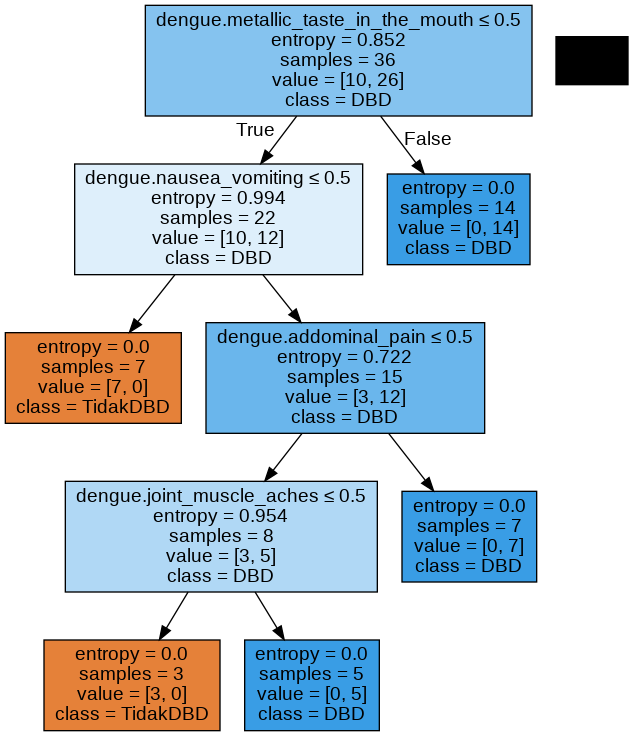

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=False,
                special_characters=True,feature_names = feature_cols,class_names=['TidakDBD','DBD'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())